<div style="height:100px">

<div style="display:inline-block; width:77%; vertical-align:middle;">
    <div>
        <b>Author</b>: <a href="http://pages.di.unipi.it/castellana/">Daniele Castellana</a>
    </div>
    <div>
        PhD student at the Univeristy of Pisa and member of the Computational Intelligence & Machine Learning Group (<a href="http://www.di.unipi.it/groups/ciml/">CIML</a>)
    </div>
    <div>
        <b>Mail</b>: <a href="mailto:daniele.castellana@di.unipi.it">daniele.castellana@di.unipi.it</a>
    </div>
</div>

<div style="display:inline-block; width: 10%; vertical-align:middle;">
    <img align="right" width="100%" src="https://upload.wikimedia.org/wikipedia/it/7/72/Stemma_unipi.png">
</div>

<div style="display:inline-block; width: 10%; vertical-align:middle;">
    <img align="right" width="100%" src="http://www.di.unipi.it/groups/ciml/Home_files/loghi/logo_ciml-restyling2018.svg">
</div>
</div>

# Introduction to Neural Networks in Keras

In this notebook we will learn how to use Keras library to build a simple NN.

Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano. It was developed with a focus on enabling fast experimentation. You can found more information in the [official documentation](https://keras.io/).


## Simple Classification problem
In this first example, we will take a simple binary classification problem (picked up from [here](https://machinelearningmastery.com/how-to-reduce-overfitting-in-deep-learning-with-weight-regularization/)).

The problem defines two semi-circles of point in $\mathbb{R}^2$: one semi-circle for each class.

Each observation has two input variables with the same scale and a class output value of either 0 or 1. This dataset is called the “moons” dataset because of the shape of the observations in each class when plotted.

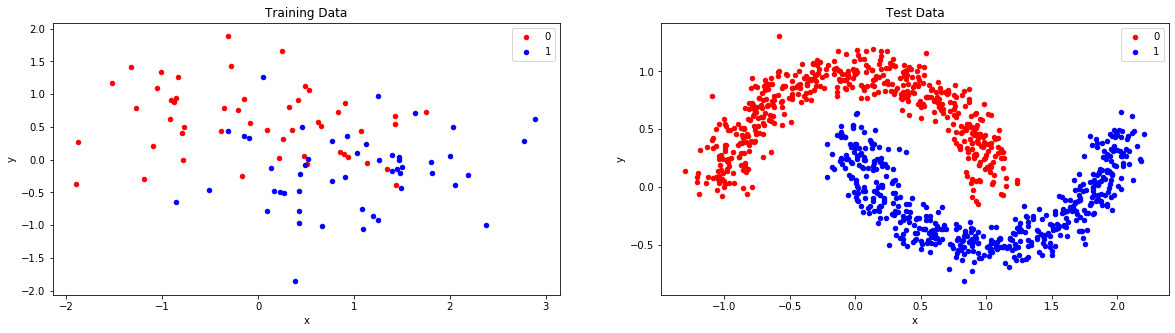

The training set is matrix of size (100, 2).
100 is the number of samples and 2 is the number of feature.

The test set is matrix of size (1000, 2).
1000 is the number of samples and 2 is the number of feature.


In [13]:
from sklearn.datasets import make_moons, make_circles
import matplotlib.pyplot as plt
from pandas import DataFrame

%matplotlib inline

# generate 2d classification dataset

##################################### YOU CAN IGNORE THESE LINES; THEY GENERATE THE DATA ########################################################
x_train, y_train = make_moons(n_samples=100, noise=0.5, random_state=1)
x_test, y_test = make_moons(n_samples=1000, noise=0.1, random_state=1)

# scatter plot, dots colored by class value
df = DataFrame(dict(x=x_train[:,0], y=x_train[:,1], label=y_train))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots(1,2,figsize=(20,5))
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax[0], kind='scatter', x='x', y='y', label=key, color=colors[key])
ax[0].title.set_text('Training Data')
#plt.show()

df = DataFrame(dict(x=x_test[:,0], y=x_test[:,1], label=y_test))
colors = {0:'red', 1:'blue'}
#fig, ax = plt.subplot(1,2,2)
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax[1], kind='scatter', x='x', y='y', label=key, color=colors[key])
ax[1].title.set_text('Test Data')
plt.show()
################################################################################################################################

print("The training set is matrix of size {}.\n"
      "{} is the number of samples and {} is the number of feature.\n".format(x_train.shape, x_train.shape[0], x_train.shape[1]))

print("The test set is matrix of size {}.\n"
      "{} is the number of samples and {} is the number of feature.".format(x_test.shape, x_test.shape[0], x_test.shape[1]))


## Model Definition
Keras has two main components which define a model:
- the keras.Model
- the keras.Layer

### Layer
The "Layer" class corresponds to what we refer to in the literature as a "layer" (as in "convolution layer" or "recurrent layer") or as a "block" (as in "ResNet block" or "Inception block"). Check the [documentation page](https://keras.io/layers/about-keras-layers/).

Essentially, a Keras layer perform some operation over an input tensor in order to produce an output tensor.

Almost every building blocks you have seen in this course have a corresponding Keras layer. You can find a list on the [documentation page](https://keras.io/layers/core/).

In this example, we use the **Dense** layer which represents a Neural Network. The Dense layer is defined through the following main arguments:
- **input_shape**: the shape of the input tensor; it is mandatory only if it is the first layer
- **units**: positive integer, dimensionality of the output space
- **activation**: activation function to use; if you don't specify anything, the "linear" activation is applied: a(x) = x

### Model
The "Model" class corresponds to what is referred to in the literature as a "model" (as in "deep learning model") or as a "network" (as in "deep neural network"). Check the [documentation page](https://keras.io/models/about-keras-models/).

Hence, the Keras model allows to combine together muiltple layers in order to define a complete network.

There are two main ways to define a module:
- the sequential API
- the functional API

##### Sequential API

The Sequential model is a linear stack of layers.

You can create a Sequential model by passing a list of layer instances to the constructor or simply add layers via the .add() method.

The model needs to know what input shape it should expect. For this reason, the first layer in a Sequential model (and only the first, because following layers can do automatic shape inference) needs to receive information about its input shape.

##### Functional API

The Keras functional API is the way to go for defining complex models, such as multi-output models, directed acyclic graphs, or models with shared layers.

## Model Compilation

Once the model have been defined, we need to compile it.

The compilation requires the specification of two fundamentals parameters for the learning phase:
- the **optimizer** method
- the **loss** function

We can also specify other **metrics** to evaluate the model.

In [2]:
from keras.models import Sequential
from keras.layers import Dense

# define the model using the Sequential API and the Dense layer
def build_model():
    
    n_feature = x_train.shape[1]
    model = Sequential()
    model.add(Dense(200, input_dim=n_feature, activation='relu'))
    model.add(Dense(200, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

Using TensorFlow backend.


## Fit the model

The model learns form the data calling the model method **fit()**.

Other parameters can be specified, such as the number of epochs and the batch size.

In [3]:
#fit the model
model1 = build_model()

history_1 = model1.fit(x_train, y_train, epochs=50, batch_size=1, verbose=2).history

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/50
 - 1s - loss: 0.5046 - acc: 0.7400
Epoch 2/50
 - 0s - loss: 0.4275 - acc: 0.8000
Epoch 3/50
 - 0s - loss: 0.4238 - acc: 0.8000
Epoch 4/50
 - 0s - loss: 0.4076 - acc: 0.8200
Epoch 5/50
 - 0s - loss: 0.4113 - acc: 0.7700
Epoch 6/50
 - 0s - loss: 0.4086 - acc: 0.8200
Epoch 7/50
 - 0s - loss: 0.3977 - acc: 0.8000
Epoch 8/50
 - 0s - loss: 0.3956 - acc: 0.8100
Epoch 9/50
 - 0s - loss: 0.3999 - acc: 0.8200
Epoch 10/50
 - 0s - loss: 0.3986 - acc: 0.8000
Epoch 11/50
 - 0s - loss: 0.3861 - acc: 0.8000
Epoch 12/50
 - 0s - loss: 0.3910 - acc: 0.7800
Epoch 13/50
 - 0s - loss: 0.3808 - acc: 0.8000
Epoch 14/50
 - 0s - loss: 0.3889 - acc: 0.8100
Epoch 15/50
 - 0s - loss: 0.3769 - acc: 0.8200
Epoch 16/50
 - 0s - loss: 0.3816 - acc: 0.7900
Epoch 17/50
 - 0s - loss: 0.3755 - acc: 0.7900
Epoch 18/50
 - 0s - loss: 0.3720 - acc: 0.8200
Epoch 19/50
 - 0s - loss: 0.3754 - acc: 0.8

**Let's play a bit! We fit the same architecture increasing the batch size. What happens?**

In [4]:
# create the model
model2 = build_model()

# fit the model
history_2 = model2.fit(x_train, y_train, epochs=50, batch_size=10, verbose=2).history

Epoch 1/50
 - 0s - loss: 0.6004 - acc: 0.7000
Epoch 2/50
 - 0s - loss: 0.4804 - acc: 0.7800
Epoch 3/50
 - 0s - loss: 0.4330 - acc: 0.7800
Epoch 4/50
 - 0s - loss: 0.4192 - acc: 0.7900
Epoch 5/50
 - 0s - loss: 0.4121 - acc: 0.8100
Epoch 6/50
 - 0s - loss: 0.4018 - acc: 0.8100
Epoch 7/50
 - 0s - loss: 0.4058 - acc: 0.8000
Epoch 8/50
 - 0s - loss: 0.3985 - acc: 0.8100
Epoch 9/50
 - 0s - loss: 0.3937 - acc: 0.8200
Epoch 10/50
 - 0s - loss: 0.3997 - acc: 0.8200
Epoch 11/50
 - 0s - loss: 0.3941 - acc: 0.8100
Epoch 12/50
 - 0s - loss: 0.3906 - acc: 0.8000
Epoch 13/50
 - 0s - loss: 0.3861 - acc: 0.8100
Epoch 14/50
 - 0s - loss: 0.3843 - acc: 0.8200
Epoch 15/50
 - 0s - loss: 0.3831 - acc: 0.8300
Epoch 16/50
 - 0s - loss: 0.3814 - acc: 0.8300
Epoch 17/50
 - 0s - loss: 0.3786 - acc: 0.8200
Epoch 18/50
 - 0s - loss: 0.3764 - acc: 0.8100
Epoch 19/50
 - 0s - loss: 0.3748 - acc: 0.8300
Epoch 20/50
 - 0s - loss: 0.3729 - acc: 0.8300
Epoch 21/50
 - 0s - loss: 0.3711 - acc: 0.8300
Epoch 22/50
 - 0s - lo

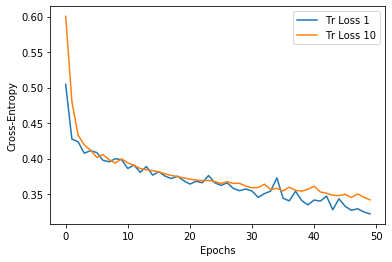

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history_1['loss'], label='Tr Loss 1')
plt.plot(history_2['loss'], label='Tr Loss 10')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy')
plt.legend();

**THE LEARNING IS MORE STABLE**

## Evaluate the model

We compare the two learned models on the **test set**.

In order to evaluate the performance of the model on new dataset, we call the model method **.evaluate()**.

In [6]:
test_loss_1, test_acc_1 = model1.evaluate(x_test, y_test)
test_loss_2, test_acc_2 = model2.evaluate(x_test, y_test)

1000/1000 [==============================] - 0s 132us/step


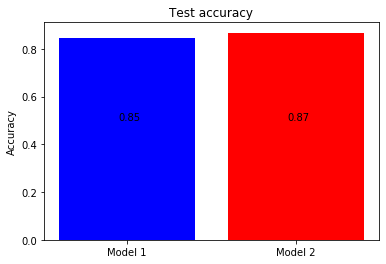

In [7]:
plt.bar([1,2], [test_acc_1, test_acc_2], color=['blue','red'])
plt.xticks([1,2], ['Model 1', 'Model 2'])
plt.ylabel('Accuracy')
plt.text(0.95, 0.5, '{:.2f}'.format(test_acc_1))
plt.text(1.95, 0.5, '{:.2f}'.format(test_acc_2))
plt.title('Test accuracy');


Now we increase the number of epochs.

In [9]:
# create the model
model3 = build_model()

# fit the model
history_3 = model3.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=1000, batch_size=10, verbose=2).history

Train on 100 samples, validate on 1000 samples
Epoch 1/1000
 - 1s - loss: 0.6408 - acc: 0.6500 - val_loss: 0.5369 - val_acc: 0.8180
Epoch 2/1000
 - 0s - loss: 0.5195 - acc: 0.7700 - val_loss: 0.4318 - val_acc: 0.8180
Epoch 3/1000
 - 0s - loss: 0.4538 - acc: 0.7600 - val_loss: 0.3650 - val_acc: 0.8650
Epoch 4/1000
 - 0s - loss: 0.4296 - acc: 0.7900 - val_loss: 0.3280 - val_acc: 0.8520
Epoch 5/1000
 - 0s - loss: 0.4116 - acc: 0.8000 - val_loss: 0.3161 - val_acc: 0.8580
Epoch 6/1000
 - 0s - loss: 0.4084 - acc: 0.7900 - val_loss: 0.3100 - val_acc: 0.8670
Epoch 7/1000
 - 0s - loss: 0.4030 - acc: 0.8100 - val_loss: 0.3052 - val_acc: 0.8660
Epoch 8/1000
 - 0s - loss: 0.3990 - acc: 0.8000 - val_loss: 0.3019 - val_acc: 0.8660
Epoch 9/1000
 - 0s - loss: 0.3968 - acc: 0.7900 - val_loss: 0.3046 - val_acc: 0.8620
Epoch 10/1000
 - 0s - loss: 0.3951 - acc: 0.8100 - val_loss: 0.3018 - val_acc: 0.8670
Epoch 11/1000
 - 0s - loss: 0.3895 - acc: 0.8200 - val_loss: 0.3036 - val_acc: 0.8630
Epoch 12/1000
 -

Epoch 96/1000
 - 0s - loss: 0.3101 - acc: 0.8400 - val_loss: 0.2470 - val_acc: 0.8760
Epoch 97/1000
 - 0s - loss: 0.3132 - acc: 0.8400 - val_loss: 0.2391 - val_acc: 0.8760
Epoch 98/1000
 - 0s - loss: 0.3052 - acc: 0.8600 - val_loss: 0.2315 - val_acc: 0.8790
Epoch 99/1000
 - 0s - loss: 0.3060 - acc: 0.8400 - val_loss: 0.2421 - val_acc: 0.8770
Epoch 100/1000
 - 0s - loss: 0.3091 - acc: 0.8300 - val_loss: 0.2350 - val_acc: 0.8860
Epoch 101/1000
 - 0s - loss: 0.3052 - acc: 0.8600 - val_loss: 0.2344 - val_acc: 0.8750
Epoch 102/1000
 - 0s - loss: 0.3050 - acc: 0.8300 - val_loss: 0.2363 - val_acc: 0.8760
Epoch 103/1000
 - 0s - loss: 0.3000 - acc: 0.8400 - val_loss: 0.2356 - val_acc: 0.8970
Epoch 104/1000
 - 0s - loss: 0.3048 - acc: 0.8500 - val_loss: 0.2312 - val_acc: 0.8800
Epoch 105/1000
 - 0s - loss: 0.3016 - acc: 0.8600 - val_loss: 0.2293 - val_acc: 0.8950
Epoch 106/1000
 - 0s - loss: 0.3038 - acc: 0.8400 - val_loss: 0.2349 - val_acc: 0.8820
Epoch 107/1000
 - 0s - loss: 0.2974 - acc: 0.84

Epoch 191/1000
 - 0s - loss: 0.2330 - acc: 0.8900 - val_loss: 0.2266 - val_acc: 0.9070
Epoch 192/1000
 - 0s - loss: 0.2339 - acc: 0.8800 - val_loss: 0.2251 - val_acc: 0.8900
Epoch 193/1000
 - 0s - loss: 0.2372 - acc: 0.8700 - val_loss: 0.2272 - val_acc: 0.9030
Epoch 194/1000
 - 0s - loss: 0.2333 - acc: 0.8900 - val_loss: 0.2223 - val_acc: 0.9110
Epoch 195/1000
 - 0s - loss: 0.2349 - acc: 0.8900 - val_loss: 0.2325 - val_acc: 0.8790
Epoch 196/1000
 - 0s - loss: 0.2340 - acc: 0.8900 - val_loss: 0.2266 - val_acc: 0.9050
Epoch 197/1000
 - 0s - loss: 0.2368 - acc: 0.8700 - val_loss: 0.2362 - val_acc: 0.8850
Epoch 198/1000
 - 0s - loss: 0.2335 - acc: 0.8700 - val_loss: 0.2314 - val_acc: 0.8850
Epoch 199/1000
 - 0s - loss: 0.2269 - acc: 0.8900 - val_loss: 0.2306 - val_acc: 0.8990
Epoch 200/1000
 - 0s - loss: 0.2402 - acc: 0.8500 - val_loss: 0.2265 - val_acc: 0.8950
Epoch 201/1000
 - 0s - loss: 0.2307 - acc: 0.8700 - val_loss: 0.2384 - val_acc: 0.8930
Epoch 202/1000
 - 0s - loss: 0.2276 - acc: 

 - 0s - loss: 0.1816 - acc: 0.8900 - val_loss: 0.2726 - val_acc: 0.8240
Epoch 286/1000
 - 0s - loss: 0.1820 - acc: 0.9100 - val_loss: 0.2859 - val_acc: 0.8220
Epoch 287/1000
 - 0s - loss: 0.1650 - acc: 0.9400 - val_loss: 0.3018 - val_acc: 0.8080
Epoch 288/1000
 - 0s - loss: 0.1635 - acc: 0.9400 - val_loss: 0.2743 - val_acc: 0.8300
Epoch 289/1000
 - 0s - loss: 0.1573 - acc: 0.9400 - val_loss: 0.2850 - val_acc: 0.8140
Epoch 290/1000
 - 0s - loss: 0.1555 - acc: 0.9400 - val_loss: 0.3165 - val_acc: 0.7960
Epoch 291/1000
 - 0s - loss: 0.1573 - acc: 0.9200 - val_loss: 0.2908 - val_acc: 0.8110
Epoch 292/1000
 - 0s - loss: 0.1551 - acc: 0.9400 - val_loss: 0.2803 - val_acc: 0.8330
Epoch 293/1000
 - 0s - loss: 0.1555 - acc: 0.9400 - val_loss: 0.3127 - val_acc: 0.7880
Epoch 294/1000
 - 0s - loss: 0.1523 - acc: 0.9400 - val_loss: 0.2952 - val_acc: 0.8050
Epoch 295/1000
 - 0s - loss: 0.1542 - acc: 0.9400 - val_loss: 0.3057 - val_acc: 0.8000
Epoch 296/1000
 - 0s - loss: 0.1486 - acc: 0.9400 - val_lo

Epoch 380/1000
 - 0s - loss: 0.1324 - acc: 0.9400 - val_loss: 0.4212 - val_acc: 0.7680
Epoch 381/1000
 - 0s - loss: 0.1167 - acc: 0.9600 - val_loss: 0.3817 - val_acc: 0.7860
Epoch 382/1000
 - 0s - loss: 0.1337 - acc: 0.9300 - val_loss: 0.3726 - val_acc: 0.7870
Epoch 383/1000
 - 0s - loss: 0.1093 - acc: 0.9600 - val_loss: 0.3907 - val_acc: 0.7850
Epoch 384/1000
 - 0s - loss: 0.1195 - acc: 0.9600 - val_loss: 0.3893 - val_acc: 0.7790
Epoch 385/1000
 - 0s - loss: 0.1120 - acc: 0.9500 - val_loss: 0.4240 - val_acc: 0.7710
Epoch 386/1000
 - 0s - loss: 0.1224 - acc: 0.9400 - val_loss: 0.4145 - val_acc: 0.7740
Epoch 387/1000
 - 0s - loss: 0.1301 - acc: 0.9400 - val_loss: 0.3794 - val_acc: 0.7940
Epoch 388/1000
 - 0s - loss: 0.1128 - acc: 0.9500 - val_loss: 0.3834 - val_acc: 0.7840
Epoch 389/1000
 - 0s - loss: 0.1201 - acc: 0.9500 - val_loss: 0.4158 - val_acc: 0.7700
Epoch 390/1000
 - 0s - loss: 0.1232 - acc: 0.9500 - val_loss: 0.4069 - val_acc: 0.7830
Epoch 391/1000
 - 0s - loss: 0.1266 - acc: 

 - 0s - loss: 0.1027 - acc: 0.9600 - val_loss: 0.4360 - val_acc: 0.7990
Epoch 475/1000
 - 0s - loss: 0.1003 - acc: 0.9700 - val_loss: 0.4961 - val_acc: 0.7720
Epoch 476/1000
 - 0s - loss: 0.0975 - acc: 0.9500 - val_loss: 0.4777 - val_acc: 0.7720
Epoch 477/1000
 - 0s - loss: 0.1038 - acc: 0.9500 - val_loss: 0.5079 - val_acc: 0.7700
Epoch 478/1000
 - 0s - loss: 0.1170 - acc: 0.9500 - val_loss: 0.4480 - val_acc: 0.7940
Epoch 479/1000
 - 0s - loss: 0.0994 - acc: 0.9500 - val_loss: 0.5427 - val_acc: 0.7570
Epoch 480/1000
 - 0s - loss: 0.1082 - acc: 0.9300 - val_loss: 0.5056 - val_acc: 0.7720
Epoch 481/1000
 - 0s - loss: 0.1093 - acc: 0.9600 - val_loss: 0.4470 - val_acc: 0.7910
Epoch 482/1000
 - 0s - loss: 0.1087 - acc: 0.9400 - val_loss: 0.5074 - val_acc: 0.7710
Epoch 483/1000
 - 0s - loss: 0.1037 - acc: 0.9600 - val_loss: 0.5351 - val_acc: 0.7690
Epoch 484/1000
 - 0s - loss: 0.1013 - acc: 0.9600 - val_loss: 0.5130 - val_acc: 0.7680
Epoch 485/1000
 - 0s - loss: 0.0970 - acc: 0.9600 - val_lo

Epoch 569/1000
 - 0s - loss: 0.0854 - acc: 0.9800 - val_loss: 0.5591 - val_acc: 0.7780
Epoch 570/1000
 - 0s - loss: 0.0940 - acc: 0.9600 - val_loss: 0.5683 - val_acc: 0.7780
Epoch 571/1000
 - 0s - loss: 0.0938 - acc: 0.9600 - val_loss: 0.6176 - val_acc: 0.7690
Epoch 572/1000
 - 0s - loss: 0.0839 - acc: 0.9600 - val_loss: 0.5777 - val_acc: 0.7700
Epoch 573/1000
 - 0s - loss: 0.0858 - acc: 0.9800 - val_loss: 0.6069 - val_acc: 0.7690
Epoch 574/1000
 - 0s - loss: 0.0909 - acc: 0.9700 - val_loss: 0.5823 - val_acc: 0.7730
Epoch 575/1000
 - 0s - loss: 0.0867 - acc: 0.9700 - val_loss: 0.6323 - val_acc: 0.7630
Epoch 576/1000
 - 0s - loss: 0.0966 - acc: 0.9500 - val_loss: 0.5511 - val_acc: 0.7850
Epoch 577/1000
 - 0s - loss: 0.0893 - acc: 0.9600 - val_loss: 0.6094 - val_acc: 0.7670
Epoch 578/1000
 - 0s - loss: 0.1095 - acc: 0.9500 - val_loss: 0.6075 - val_acc: 0.7710
Epoch 579/1000
 - 0s - loss: 0.1068 - acc: 0.9600 - val_loss: 0.5613 - val_acc: 0.7830
Epoch 580/1000
 - 0s - loss: 0.1063 - acc: 

 - 0s - loss: 0.0852 - acc: 0.9600 - val_loss: 0.7046 - val_acc: 0.7740
Epoch 664/1000
 - 0s - loss: 0.0678 - acc: 0.9700 - val_loss: 0.6839 - val_acc: 0.7790
Epoch 665/1000
 - 0s - loss: 0.0705 - acc: 0.9800 - val_loss: 0.7315 - val_acc: 0.7700
Epoch 666/1000
 - 0s - loss: 0.0781 - acc: 0.9600 - val_loss: 0.7253 - val_acc: 0.7690
Epoch 667/1000
 - 0s - loss: 0.0704 - acc: 0.9700 - val_loss: 0.6887 - val_acc: 0.7870
Epoch 668/1000
 - 0s - loss: 0.0814 - acc: 0.9700 - val_loss: 0.6788 - val_acc: 0.7760
Epoch 669/1000
 - 0s - loss: 0.0753 - acc: 0.9500 - val_loss: 0.7878 - val_acc: 0.7580
Epoch 670/1000
 - 0s - loss: 0.0738 - acc: 0.9600 - val_loss: 0.7009 - val_acc: 0.7790
Epoch 671/1000
 - 0s - loss: 0.0727 - acc: 0.9700 - val_loss: 0.7107 - val_acc: 0.7790
Epoch 672/1000
 - 0s - loss: 0.0690 - acc: 0.9600 - val_loss: 0.7098 - val_acc: 0.7750
Epoch 673/1000
 - 0s - loss: 0.0780 - acc: 0.9700 - val_loss: 0.7715 - val_acc: 0.7710
Epoch 674/1000
 - 0s - loss: 0.0998 - acc: 0.9700 - val_lo

Epoch 758/1000
 - 0s - loss: 0.0652 - acc: 0.9700 - val_loss: 0.7381 - val_acc: 0.7810
Epoch 759/1000
 - 0s - loss: 0.0777 - acc: 0.9500 - val_loss: 0.8003 - val_acc: 0.7750
Epoch 760/1000
 - 0s - loss: 0.0857 - acc: 0.9500 - val_loss: 0.7246 - val_acc: 0.7830
Epoch 761/1000
 - 0s - loss: 0.0984 - acc: 0.9600 - val_loss: 0.7823 - val_acc: 0.7760
Epoch 762/1000
 - 0s - loss: 0.0732 - acc: 0.9700 - val_loss: 0.7531 - val_acc: 0.7760
Epoch 763/1000
 - 0s - loss: 0.0628 - acc: 0.9700 - val_loss: 0.7667 - val_acc: 0.7710
Epoch 764/1000
 - 0s - loss: 0.0622 - acc: 0.9700 - val_loss: 0.7704 - val_acc: 0.7720
Epoch 765/1000
 - 0s - loss: 0.0682 - acc: 0.9700 - val_loss: 0.7393 - val_acc: 0.7860
Epoch 766/1000
 - 0s - loss: 0.0778 - acc: 0.9700 - val_loss: 0.8035 - val_acc: 0.7730
Epoch 767/1000
 - 0s - loss: 0.0714 - acc: 0.9700 - val_loss: 0.7195 - val_acc: 0.7890
Epoch 768/1000
 - 0s - loss: 0.0622 - acc: 0.9700 - val_loss: 0.7227 - val_acc: 0.7880
Epoch 769/1000
 - 0s - loss: 0.0618 - acc: 

 - 0s - loss: 0.0522 - acc: 0.9800 - val_loss: 0.7816 - val_acc: 0.7830
Epoch 853/1000
 - 0s - loss: 0.0654 - acc: 0.9800 - val_loss: 0.7628 - val_acc: 0.7920
Epoch 854/1000
 - 0s - loss: 0.0628 - acc: 0.9700 - val_loss: 0.8461 - val_acc: 0.7760
Epoch 855/1000
 - 0s - loss: 0.0629 - acc: 0.9800 - val_loss: 0.7546 - val_acc: 0.7950
Epoch 856/1000
 - 0s - loss: 0.0717 - acc: 0.9600 - val_loss: 0.8132 - val_acc: 0.7830
Epoch 857/1000
 - 0s - loss: 0.0559 - acc: 0.9800 - val_loss: 0.7550 - val_acc: 0.7950
Epoch 858/1000
 - 0s - loss: 0.0609 - acc: 0.9800 - val_loss: 0.7997 - val_acc: 0.7830
Epoch 859/1000
 - 0s - loss: 0.0714 - acc: 0.9500 - val_loss: 0.8350 - val_acc: 0.7750
Epoch 860/1000
 - 0s - loss: 0.0685 - acc: 0.9800 - val_loss: 0.7247 - val_acc: 0.8010
Epoch 861/1000
 - 0s - loss: 0.0773 - acc: 0.9500 - val_loss: 0.8104 - val_acc: 0.7840
Epoch 862/1000
 - 0s - loss: 0.0652 - acc: 0.9700 - val_loss: 0.7533 - val_acc: 0.7910
Epoch 863/1000
 - 0s - loss: 0.0697 - acc: 0.9600 - val_lo

Epoch 947/1000
 - 0s - loss: 0.0585 - acc: 0.9700 - val_loss: 0.7940 - val_acc: 0.7900
Epoch 948/1000
 - 0s - loss: 0.0711 - acc: 0.9500 - val_loss: 0.9068 - val_acc: 0.7740
Epoch 949/1000
 - 0s - loss: 0.0611 - acc: 0.9700 - val_loss: 0.7774 - val_acc: 0.7960
Epoch 950/1000
 - 0s - loss: 0.0736 - acc: 0.9600 - val_loss: 0.8754 - val_acc: 0.7760
Epoch 951/1000
 - 0s - loss: 0.0517 - acc: 0.9800 - val_loss: 0.8492 - val_acc: 0.7810
Epoch 952/1000
 - 0s - loss: 0.0566 - acc: 0.9800 - val_loss: 0.8366 - val_acc: 0.7860
Epoch 953/1000
 - 0s - loss: 0.0511 - acc: 0.9800 - val_loss: 0.8517 - val_acc: 0.7800
Epoch 954/1000
 - 0s - loss: 0.0628 - acc: 0.9800 - val_loss: 0.8287 - val_acc: 0.7910
Epoch 955/1000
 - 0s - loss: 0.0525 - acc: 0.9800 - val_loss: 0.8543 - val_acc: 0.7830
Epoch 956/1000
 - 0s - loss: 0.0574 - acc: 0.9700 - val_loss: 0.8372 - val_acc: 0.7870
Epoch 957/1000
 - 0s - loss: 0.0531 - acc: 0.9800 - val_loss: 0.8709 - val_acc: 0.7780
Epoch 958/1000
 - 0s - loss: 0.0530 - acc: 

First, we compare the training error. The 3rd model seems to be the most accurate.

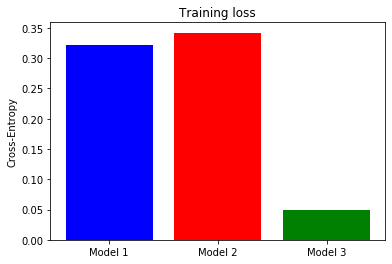

In [10]:
tr_loss_1, tr_loss_2, tr_loss_3 = history_1['loss'][-1],history_2['loss'][-1],history_3['loss'][-1] 
plt.bar([1,2,3], [tr_loss_1, tr_loss_2, tr_loss_3], color=['blue','red','green'])
plt.xticks([1,2,3], ['Model 1', 'Model 2','Model 3'])
plt.ylabel('Cross-Entropy')
plt.title('Training loss');

Now we compare all the models on the test set. **Is the 3rd model really better that the other twos?**

In [11]:
test_loss_3, test_acc_3 = model3.evaluate(x_test, y_test)

1000/1000 [==============================] - 0s 25us/step


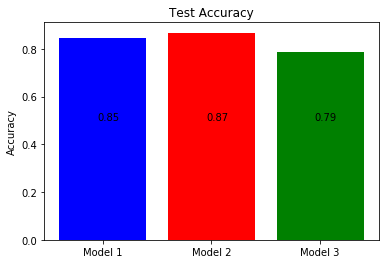

In [12]:
plt.bar([1,2,3], [test_acc_1, test_acc_2, test_acc_3], color=['blue','red','green'])
plt.xticks([1,2,3], ['Model 1', 'Model 2','Model 3'])
plt.ylabel('Accuracy')
plt.text(0.95, 0.5, '{:.2f}'.format(test_acc_1))
plt.text(1.95, 0.5, '{:.2f}'.format(test_acc_2))
plt.text(2.95, 0.5, '{:.2f}'.format(test_acc_3))
plt.title('Test Accuracy');

**The 3rd model goes in overfitting**

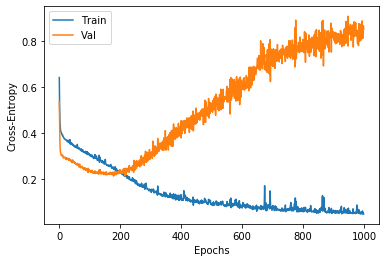

In [13]:
# we are overfitting!
plt.plot(history_3['loss'], label='Train')
plt.plot(history_3['val_loss'], label='Val')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy')
plt.legend();